In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [39]:

df = pd.read_csv("/content/Breast Cancer Data.csv")

In [40]:
df.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [41]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [42]:
df.shape

(569, 32)

In [43]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data = df.set_index('id')

In [44]:
df.groupby('diagnosis').size()

diagnosis
0    357
1    212
dtype: int64

In [68]:
#outliers using IQR
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for i in df:
    outliers = find_outliers_iqr(df)
    print(f"The number of outliers of {df} are",len(outliers))

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

In [69]:
#Outliers using Zscore
def find_outliers_zscore(data, threshold=5):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers
for i in df:
    outliers = find_outliers_iqr(df)
    print(f"The number of outliers of {df} are",len(outliers))

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

The number of outliers of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         1        17.99         10.38          122.80     1001.0   
1      842517         1        20.57         17.77          132.90     1326.0   
2    84300903         1        19.69         21.25          130.00     1203.0   
3    84348301         1        11.42         20.38           77.58      386.1   
4    84358402         1        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         1        21.56         22.39          142.00     1479.0   
565    926682         1        20.13         28.25          131.20     1261.0   
566    926954         1        16.60         28.08          108.30      858.1   
567    927241         1        20.60         29.33          140.10     1265.0   
568     92751         0         7.76         24.54           47.92      181.0   

 

<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-68-6f2bbde40b08>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)
<ipython-input-68-6f2bbde40b08>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[(data < lower_bound) | (data > upper_bound)]
<ipython-input-68-6f2bbde40b08>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated

In [70]:
def convert_to_categorical(df, column_name):
    df[column_name] = df[column_name].astype('category')
    return df

column_name_to_convert = 'diagnosis'
df = convert_to_categorical(df, column_name_to_convert)

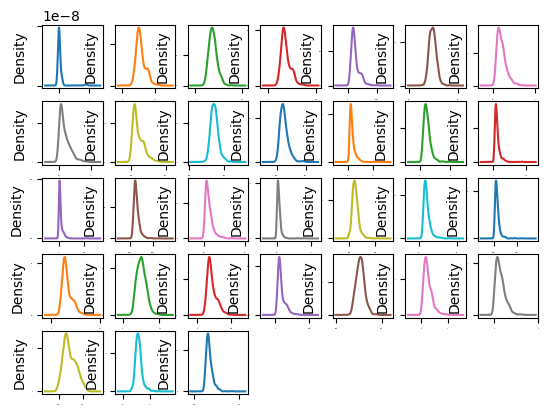

In [45]:
df.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

<ipython-input-46-c4437a9c0585>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-46-c4437a9c0585>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)


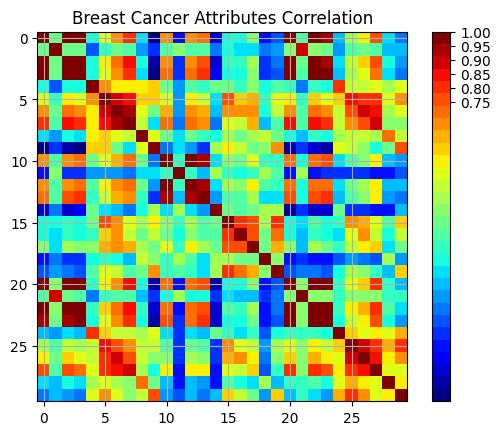

In [46]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

sns.heatmap(multilabel_confusion_matrix(Y_test, predictions), annot = True , fmt = '.1f')
plt.ylabel("Ture Labels")
plt.xlabel("Test Labels")

In [47]:
Y = df['diagnosis'].values
X = df.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [48]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [52]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=None)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.923092 (0.026413) (run time: 0.232367)
SVM: 0.600386 (0.103369) (run time: 0.161500)
NB: 0.619710 (0.055301) (run time: 0.024156)
KNN: 0.747198 (0.024851) (run time: 0.071524)


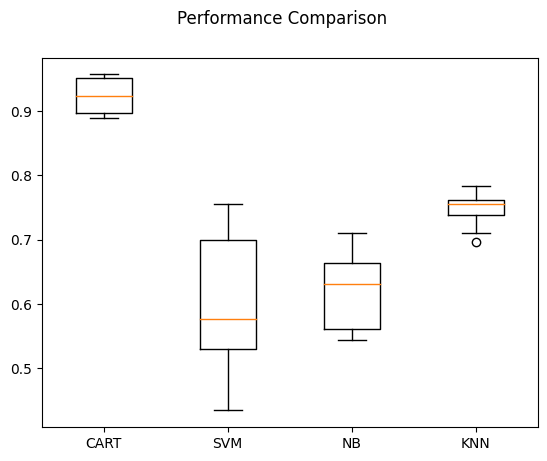

In [53]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [55]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=False, random_state=None)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.925362 (0.026018) (run time: 0.111960)
ScaledSVM: 0.964879 (0.031588) (run time: 0.076704)
ScaledNB: 0.929710 (0.042736) (run time: 0.034119)
ScaledKNN: 0.958357 (0.038595) (run time: 0.079527)


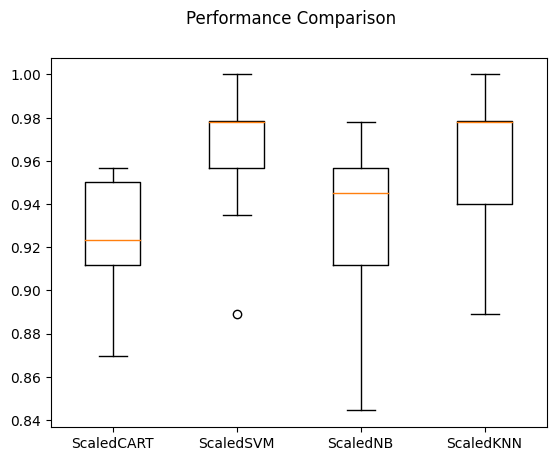

In [56]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969130 using {'C': 1.5, 'kernel': 'rbf'}
0.966957 (0.022820) with: {'C': 0.1, 'kernel': 'linear'}
0.821884 (0.050625) with: {'C': 0.1, 'kernel': 'poly'}
0.940628 (0.035553) with: {'C': 0.1, 'kernel': 'rbf'}
0.949420 (0.029770) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.964734 (0.017877) with: {'C': 0.3, 'kernel': 'linear'}
0.863671 (0.033922) with: {'C': 0.3, 'kernel': 'poly'}
0.953816 (0.024948) with: {'C': 0.3, 'kernel': 'rbf'}
0.960435 (0.027652) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.5, 'kernel': 'linear'}
0.878986 (0.030482) with: {'C': 0.5, 'kernel': 'poly'}
0.962560 (0.026103) with: {'C': 0.5, 'kernel': 'rbf'}
0.953816 (0.036422) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.964686 (0.017960) with: {'C': 0.7, 'kernel': 'linear'}
0.887874 (0.032034) with: {'C': 0.7, 'kernel': 'poly'}
0.962609 (0.027882) with: {'C': 0.7, 'kernel': 'rbf'}
0.949372 (0.037227) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.962512 (0.017495) with: {'C': 0.9, 'kernel': 'linear'

In [58]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.012919


In [59]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [60]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.97      0.97      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [61]:
print(confusion_matrix(Y_test, predictions))

[[74  1]
 [ 1 38]]


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix
classification_report


<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>